In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

In [15]:
birth_death = gs.ReactionModel(
    
                                species= {
                                            'protein': 0
                                            },

                                propensities= {
                                                'kr': 100, 
                                                'gamma':10
                                                },
                                                

                                reactions= {
                                            'translation':['kr'], 
                                            'degradation':['gamma', 'protein']
                                            },

                                q= {
                                    'translation': {'create': ['protein']}, 
                                    'degradation': {'destroy': ['protein']}})

In [16]:
positive_feedback = gs.Gillespie(tmax=1, sampling_time = 0.01,reaction_model = birth_death, model_name='positive_feedback', cells=1)
positive_feedback.simulate()

100%|██████████| 1/1 [00:00<00:00, 62.45it/s]


In [17]:
df = pd.read_csv('positive_feedback.csv', delimiter='|')
df.head()

,protein,time,cell
0,0,0.00,1
1,0,0.01,1
2,2,0.02,1
3,4,0.03,1
4,5,0.04,1


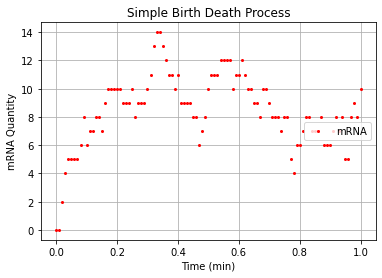

In [18]:
plt.plot(df.time, df.protein, 'ro', ms=2, label='mRNA')
plt.grid(True)
plt.title('Simple Birth Death Process')
plt.xlabel('Time (min)')
plt.ylabel('mRNA Quantity')
plt.legend(loc=5)

In [19]:
repressilator = gs.ReactionModel(
                                species = {
                                                'tetR': 550,
                                                'lacI': 1600,
                                                'alphacl': 1000,
                                                'GFP': 100
                                                },

                                propensities = {
                                                'kd_tetR': 0.02,
                                                'kd_lacI': 0.02,
                                                'kd_alphacl': 0.02,
                                                'kc_GFP': 0.05,
                                                'kd_GFP': 1/100000
                                                },
                                
                                reactions = {
                                                'PdtetR':       ['kd_tetR', 'alphacl'],
                                                'PdlacI':       ['kd_lacI', 'tetR'],
                                                'Pdalphacl':    ['kd_alphacl', 'lacI'],
                                                'GFP_cre' :     ['kc_GFP', 'lacI'],
                                                'GFP_des':      ['kd_GFP', 'tetR', 'GFP']
                                                },
                                
                                q = {
                                        'PdtetR':       {'create': ['lacI'],    'destroy': ['tetR']},
                                        'PdlacI':       {'create': ['alphacl'], 'destroy': ['lacI']},
                                        'Pdalphacl':    {'create': ['tetR'],    'destroy': ['alphacl']},
                                        'GFP_cre':      {'create': ['GFP']},
                                        'GFP_des':      {'destroy': ['GFP']}
                                        }
                                )


In [20]:
repre = gs.Gillespie(tmax=50, sampling_time = 5,reaction_model = repressilator, model_name='repre', cells=5)
repre.simulate()

100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


In [21]:
df = pd.read_csv('repre.csv', delimiter='|')
df.head()

,tetR,lacI,alphacl,GFP,time,cell
0,550,1600,1000,100,0,1
1,616,1652,882,490,5,1
2,689,1669,792,942,10,1
3,783,1639,728,1325,15,1
4,875,1619,656,1677,20,1


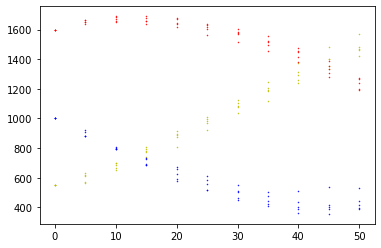

In [22]:
plt.plot(df.time, df.tetR, 'yo', ms=0.5)
plt.plot(df.time, df.lacI, 'ro', ms=0.5)
plt.plot(df.time, df.alphacl, 'bo', ms=0.5)

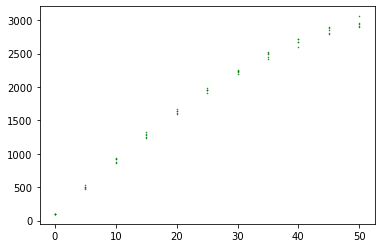

In [23]:
plt.plot(df.time, df.GFP, 'go', ms=0.5)

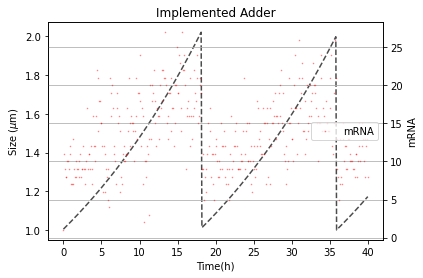

In [24]:
from GillespieSim import Gillespie as Gillespie
import numpy as np

simulation = Gillespie(tmax=40, sampling_time = 0.1, model_name='division',division_time=18,division_size=2,birth_size=np.random.normal(loc=2/2, scale=0.1*(2/2)))

simulation.sizer()

In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import GillespieSim as gs

birth_death = gs.ReactionModel(
    
                                species= {
                                            'protein': 0,
                                            'mRNA': 0
                                            },

                                propensities= {
                                                'kr': 100, 
                                                'gamma':10,
                                                'kr_mrna': 10,
                                                'gamma_mrna': 2
                                                },

                                reactions= {
                                            'translation':['kr', 'mRNA'], 
                                            'degradation':['gamma', 'protein'],
                                            'transcription':['kr_mrna'],
                                            'mRNA_degradation': ['gamma_mrna', 'mRNA']
                                            },

                                q= {
                                    'translation': {'create': ['protein']}, 
                                    'degradation': {'destroy': ['protein']},
                                    'transcription': {'create': ['mRNA']},
                                    'mRNA_degradation': {'destroy': ['mRNA']}
                                    })

birth_death_model = gs.Gillespie(tmax=50, sampling_time = 5,reaction_model = birth_death, model_name='bd', cells=5)
birth_death_model.calculate_sorted_tau()

{'translation': inf,
 'transcription': inf,
 'degradation': inf,
 'mRNA_degradation': inf}

In [26]:
dict(zip([1,2], [3,4]))

{1: 3, 2: 4}